In [75]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def convolution(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape
    h_padding = k_height // 2
    w_padding = k_width // 2

    output = np.zeros((height, width))

    for i in range(h_padding, height - h_padding):
        for j in range(w_padding, width - w_padding):
            region = image[i - h_padding : i + h_padding + 1, j - w_padding : j + w_padding + 1]
            output[i, j] = np.sum(region * kernel)

    return output.astype(np.uint8)

def average_filter(image, kernel_size=3):
    kernel = np.ones((kernel_size, kernel_size), dtype=float) / (kernel_size ** 2)
    return convolution(image, kernel)

def median_filter(image, kernel_size=3):
    height, width = image.shape
    h_padding = kernel_size // 2
    w_padding = kernel_size // 2

    output = np.zeros((height, width))

    for i in range(h_padding, height - h_padding):
        for j in range(w_padding, width - w_padding):
            region = image[i - h_padding : i + h_padding + 1, j - w_padding : j + w_padding + 1]
            output[i, j] = np.median(region)

    return output.astype(np.uint8)

def add_gaussian_noise(image, mean=0, sigma=11):
    noise = np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    noisy_image = np.clip(image + noise, 0, 255)
    return noisy_image.astype(np.uint8)

def add_salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02):
    noisy_image = np.copy(image)

    # Salt noise
    salt_mask = np.random.rand(*image.shape) < salt_prob
    noisy_image[salt_mask] = 255

    # Pepper noise
    pepper_mask = np.random.rand(*image.shape) < pepper_prob
    noisy_image[pepper_mask] = 0

    return noisy_image

def gaussian_blur(image, sigma=1):
    kernel_size = int(6 * sigma) | 1  # Ensure kernel size is odd
    kernel = cv2.getGaussianKernel(kernel_size, sigma)
    gaussian_blurred = convolution(image, np.outer(kernel, kernel))
    return gaussian_blurred

def sharpening(image, strength=1.5):
    # Use a simple gradient-based sharpening
    kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])
    sharpened = convolution(image, kernel)
    return np.clip(image + strength * sharpened, 0, 255).astype(np.uint8)

def deblur_tv_regularization(image, iterations=500, alpha=0.02):
    # Initialize the estimated image with the blurred image
    restored_image = np.copy(image).astype(np.float32)

    # Compute the gradient operator
    grad_operator = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]], dtype=np.float32)

    for _ in range(iterations):
        # Compute the gradient of the current restored image
        gradient = cv2.filter2D(restored_image, -1, grad_operator)

        # Update the restored image using the gradient and alpha
        restored_image -= alpha * gradient

    # Clip and convert to uint8
    restored_image = np.clip(restored_image, 0, 255).astype(np.uint8)

    return restored_image


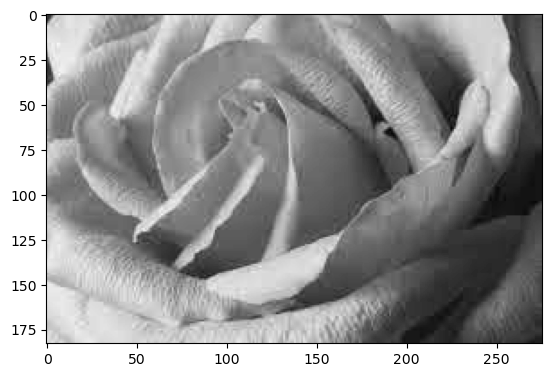

In [76]:
# Example usage:
# Load an example image in grayscale
image_path = "images.jpg"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(original_image, cmap='gray')



In [77]:

# # Apply average and median filter
# average_filtered = average_filter(original_image)
# plt.imshow(average_filtered, cmap='gray')


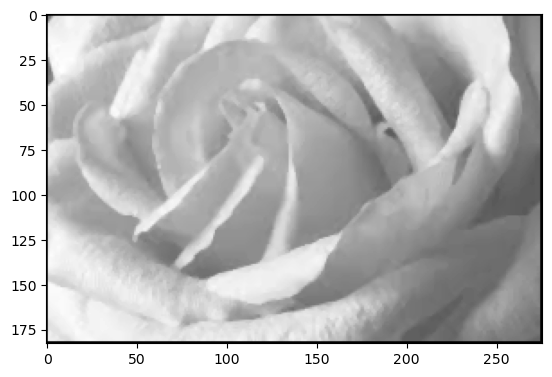

In [78]:
median_filtered = median_filter(original_image)
plt.imshow(median_filtered, cmap='gray')

# Add Gaussian noise


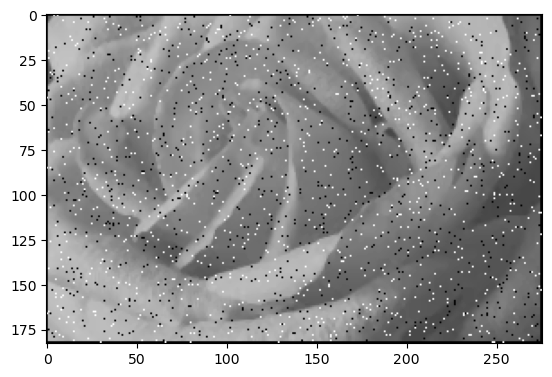

In [79]:
# noisy_image = add_gaussian_noise(median_filtered)
# plt.imshow(noisy_image, cmap='gray')

noisy_image = add_salt_and_pepper_noise(median_filtered)
plt.imshow(noisy_image, cmap='gray')


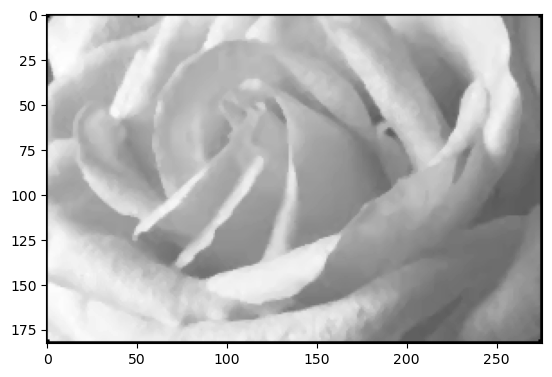

In [80]:
gaussian_blur_image = median_filter(noisy_image)
plt.imshow(gaussian_blur_image, cmap='gray')
# Denoise with Gaussian blur and unsharp masking


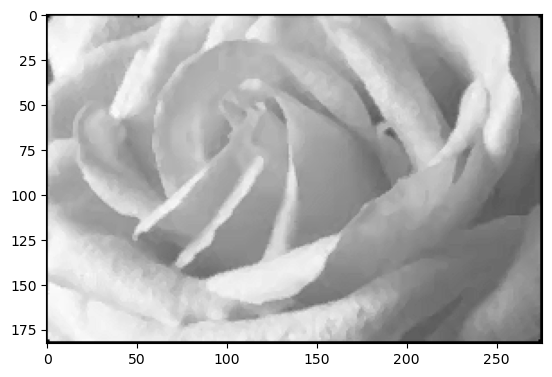

In [81]:

denoised_image = sharpening(gaussian_blur_image, strength=.07)
plt.imshow(denoised_image, cmap='gray')
# denoised_image = deblur_tv_regularization(gaussian_blur_image)
# plt.imshow(denoised_image, cmap='gray')


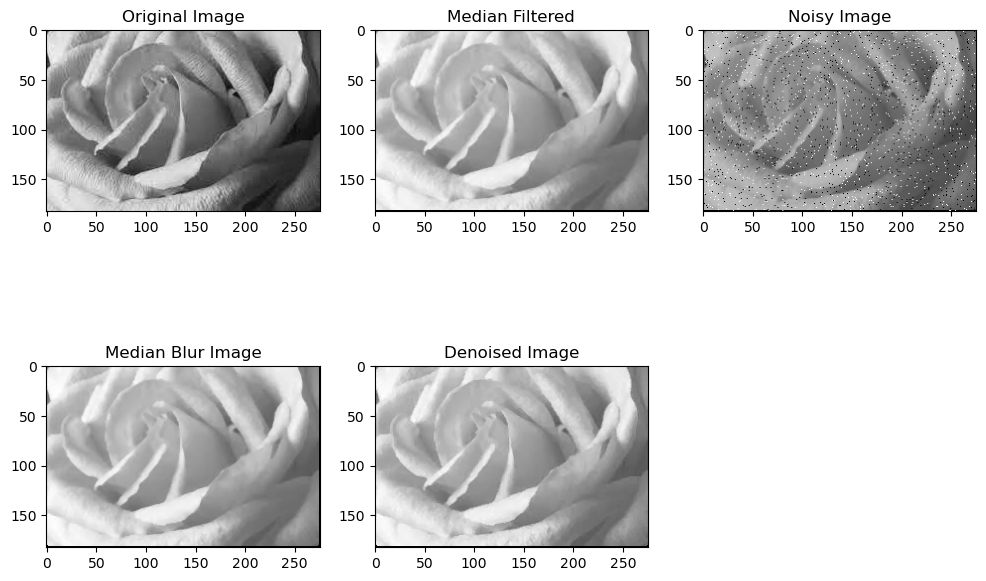

In [82]:
# Display all images in a single figure
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image') 

# plt.subplot(2, 3, 2)
# plt.imshow(average_filtered, cmap='gray')
# plt.title('Average Filtered')

plt.subplot(2, 3, 2)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtered')

plt.subplot(2, 3, 4)
plt.imshow(gaussian_blur_image, cmap='gray')
plt.title('Median Blur Image')

plt.subplot(2, 3, 3)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')

plt.subplot(2, 3, 5)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

plt.show()
